# Segmentation

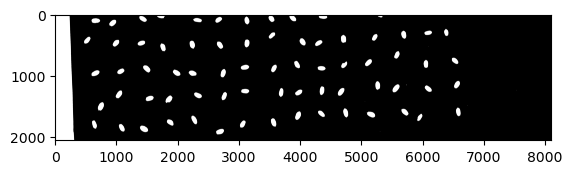

Creating images: 100% 73/73 [00:20<00:00,  3.50it/s]


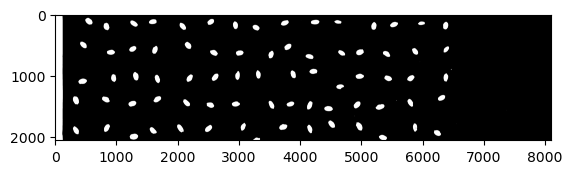

Creating images: 100% 75/75 [00:15<00:00,  4.78it/s]


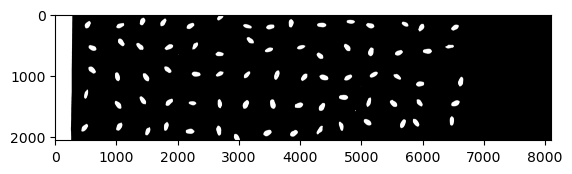

Creating images: 100% 75/75 [00:16<00:00,  4.44it/s]


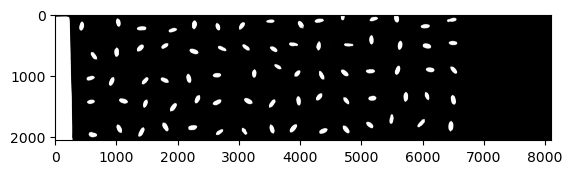

Creating images: 100% 75/75 [00:28<00:00,  2.63it/s]


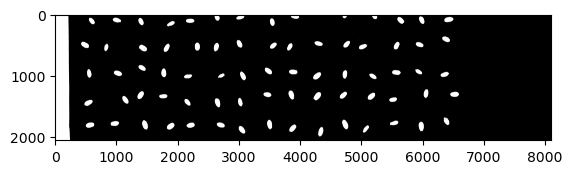

Creating images: 100% 75/75 [00:30<00:00,  2.43it/s]


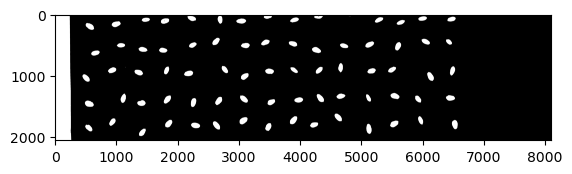

Creating images: 100% 75/75 [00:30<00:00,  2.43it/s]


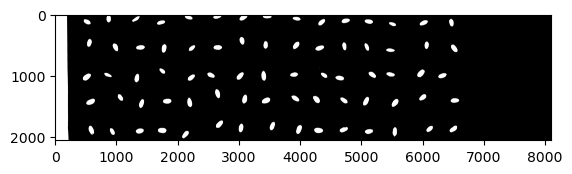

Creating images: 100% 75/75 [00:22<00:00,  3.38it/s]


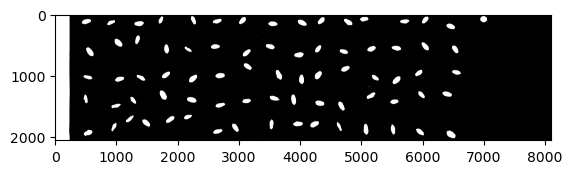

Creating images: 100% 77/77 [00:30<00:00,  2.55it/s]


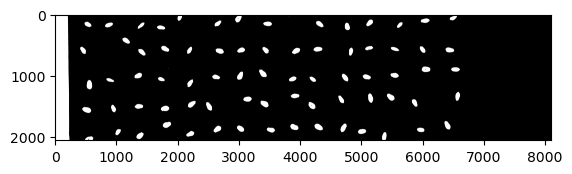

Creating images: 100% 75/75 [00:32<00:00,  2.34it/s]


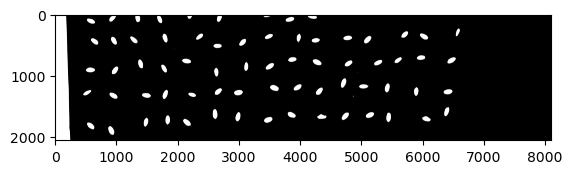

Creating images: 100% 72/72 [00:28<00:00,  2.48it/s]


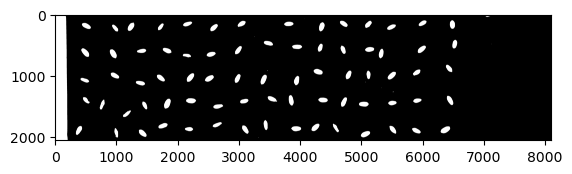

Creating images: 100% 76/76 [00:32<00:00,  2.37it/s]


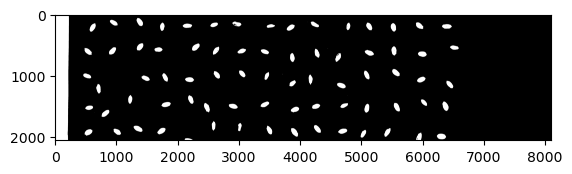

Creating images: 100% 74/74 [00:30<00:00,  2.40it/s]


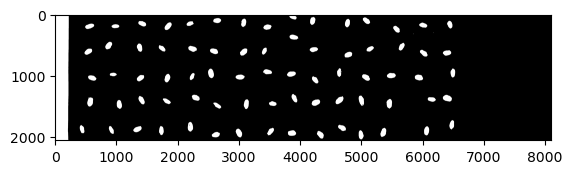

Creating images: 100% 75/75 [00:19<00:00,  3.93it/s]


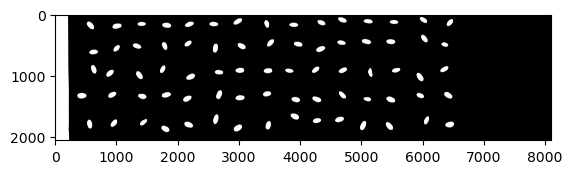

Creating images: 100% 75/75 [00:24<00:00,  3.00it/s]


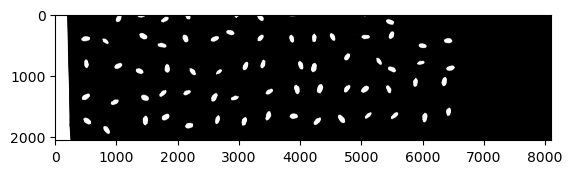

Creating images: 100% 70/70 [00:14<00:00,  4.69it/s]


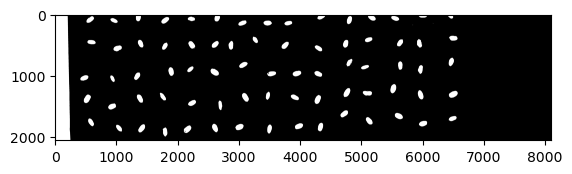

Creating images: 100% 75/75 [00:34<00:00,  2.20it/s]


In [2]:
from crop_img import crop_image, crop_all_images
from utils import read_all_annot_csv
img_dir = "img/"
img_fn = "var1_2020_x75y20_8000_us_2x_2022-04-26T122543_corr"
out_dir = "img/cropped/"
crop_all_images(path_img = img_dir, path_defauts = "img/csv/liste_defauts_grains.csv", band_step=1, crop_idx_dim1=1300, 
                        apply_mask=True, force_creation=True, verbose=False)
read_all_annot_csv(annot_dir = "img/cropped/", out_fn='full_set', clean=True)

In [3]:
from utils import *

In [4]:
shuffle_train_val_test(annot_dir = "img/cropped/", annot_fn='full_set', prop=[0.7, 0.15, 0.15])

# Face classification

Enter the name of the model to be trained model
Enter the directory of the model to be trained and its related figures models


                             Coord_centroid                      Bbox  Face  \
0  (141.85360928823826, 4035.1842503785965)     [91, 5264, 193, 5410]     1   
1    (1389.245917026469, 4290.203773230712)  [1314, 5538, 1463, 5643]     0   
2   (139.2919770773639, 6473.9160458452725)     [77, 7736, 203, 7810]     0   
3   (1407.8595424268751, 4756.532001158413)  [1352, 6009, 1468, 6105]     0   
4   (220.4588472751738, 2595.3571428571427)    [162, 3837, 280, 3959]     0   

                                            Name_hdr  Species  
0  var1_2020_x75y20_8000_us_2x_2022-04-26T130045_...        1  
1  var4_2020_x82y12_8000_us_2x_2022-04-27T092007_...        4  
2  var8_2020_x74y17_8000_us_2x_2022-04-27T082434_...        8  
3  var5_x72y18_8000_us_2x_2022-04-26T090114_corr_...        5  
4  var1_2020_x75y20_8000_us_2x_2022-04-26T122543_...        1  
                               Coord_centroid                      Bbox  Face  \
174   (1728.3928336187591, 6066.805690949809)  [1662, 7325, 

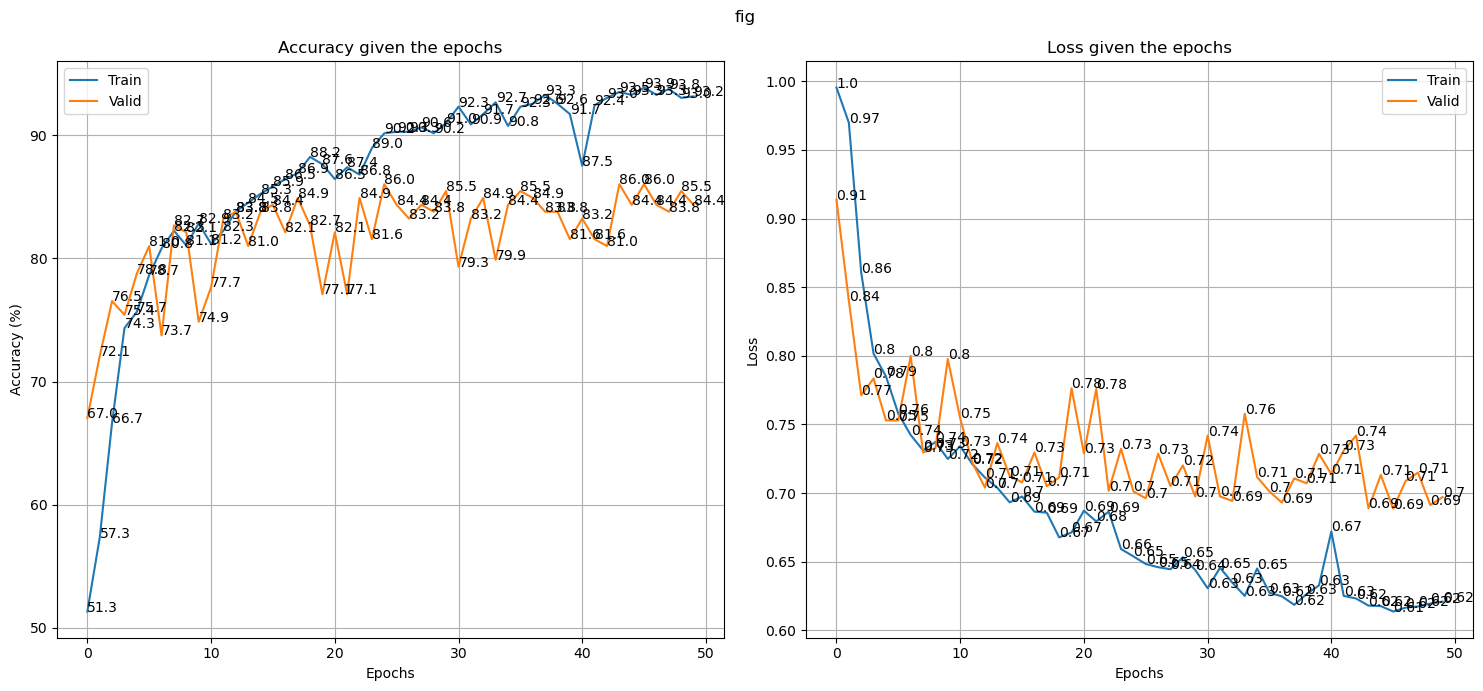


Testing model
Test : 
 Accuracy: 78.2% 	 Avg loss: 0.759195 

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        90
           1       0.75      0.86      0.80        76

   micro avg       0.78      0.84      0.81       166
   macro avg       0.78      0.84      0.81       166
weighted avg       0.78      0.84      0.81       166


Saving values of train, validation and test loops

Done!


In [4]:
annot_folder = "img/cropped/"
#read_all_annot_csv(annot_folder)

from classification_face import *
annotations_folder = "img/cropped/"
learning_rate = 1e-4
epochs = 25
weight_loss = [2., 2.,2.]
main_loop(annotations_folder, weight_loss, learning_rate, epochs=epochs, batch_size=8, other_class = False, 
          bands = [22, 53, 89])

# Reconstitute macro images

In [3]:
from utils import reconstitute_img
import numpy as np
import matplotlib.patches as patches

Image : var5_x72y18_8000_us_2x_2022-04-26T091027_corr


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


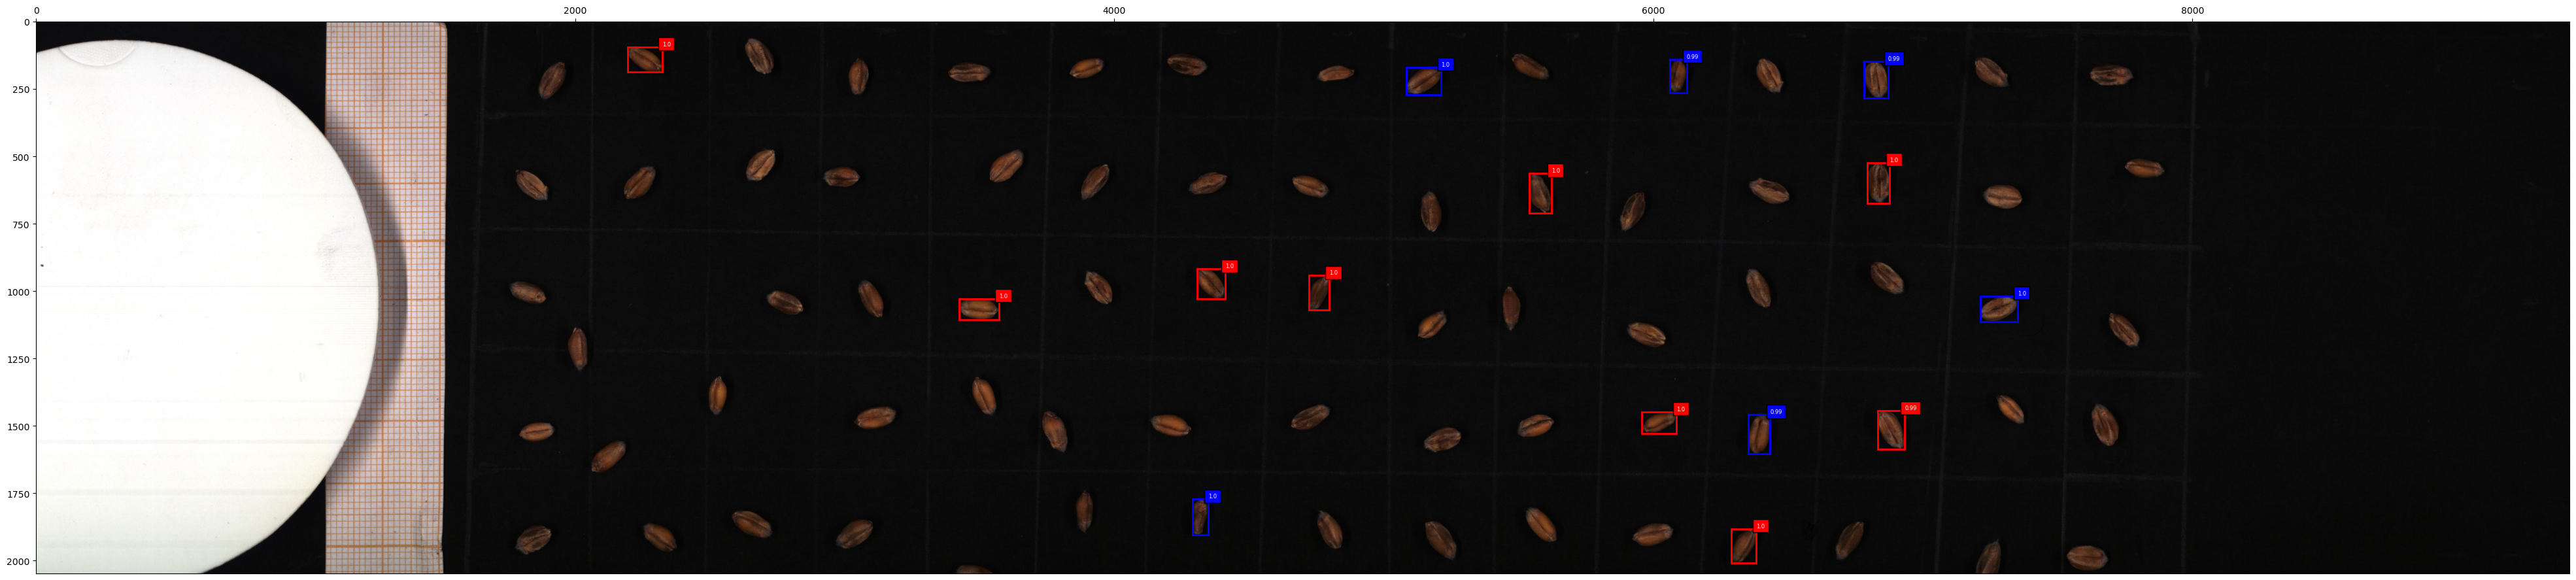

In [4]:
reconstitute_img(annot_dir_test_preds = "img/cropped/", annot_path_test_preds = "test_set", img_folder = "img/")